# Overview
In this report, we present results of training an agent for the Reacher environment using the Deep Deterministic Policy Gradient (DDPG) algorithm.

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

# Read agent's scores to plot:
scores_train = pickle.load(open('weights_learned/scores_train.pkl','rb'))
scores_test = pickle.load(open('weights_learned/scores_test.pkl','rb'))
print(len(scores_train), len(scores_test))

416 100


# Methods

## Deep Deterministic Policy Gradient (DDPG) Learning Algorithm
The Deep Deterministic Policy Gradient (DDPG) algorithm is an off-policy learning algorithm for continuous action space that simultaneously learns 1) Q-function and 2) policy. As was done for the DQN algorithm, it uses 1) Replay Buffer and 2) local vs target neural-networks to allow stable approximations of the optimal Q-function and policy.

Specifically, the Bellman equation is used to approximate the Q-function (i.e. "critic"). Here, neural-network parameters of the "critic" are optimized such that differences between target Q-function values and expected values are minimized.

Next, parameters of the local "actor" neural-network are optimized such that local version of the Q-function (i.e. local "critic"), which take actions from the "actor" neural-network yields maximum value.

Finally, target neural-networks for "actor" and "critic" are updated with their local counter parts, where update amount is determined by "tau".


## Implementation
In the notebook `training_code_solution.ipynb`, function `ddpg()` implements the main loop that goes over episodes and trains a DDPG agent. For each episode, the agent makes an action via `agent.act()` and `env.step()` functions, gets rewards and next states information from the environment, and then the agent collects experiences and learns by calling the function `agent.step()`. The main loop ends when the agent has "solved" the environment, which is achieving average score of 30+ during past 100 episodes.

As for details of the agent's implementations, they are provided in the `udacity` python package that is included with the training code notebook. Inside this package, file `ddpg_agent.py` implements the agent, and its "learn" function implements the DDPG learning algorithm described above. The file `model.py` implements "actor" and "critic" neural-networks. In terms of neural-network structures, both the "actor" and "critic" neural-networks use 2 hidden layers with sizes 512 and 256 nodes. For the critic neural-network, its 1-dimensional action vector is concatenated in the 1st hidden layer.

Lastly, hyper-parameters used in the training code are shown below. They are largely derived from those used in the DDPG algorithm paper (Lillicrap et al. 2015). For the replay buffer, its size was set to 1e6 with a batch size of 512. For the discount factor (i.e. gamma), a value of 0.99 was used. For the learning rates of actor and critic neural-networks, 1e-4 and 3e-4 were used, respectively. For the soft update, 1e-3 was used. For the learn step, the agent calls its learn() function every 4 steps so that convergence is stable. For its dropout function, probably of setting zeros of 0.2 was used. Lastly, in the `ddpg()` function `max_t` is used to set number of time steps for each episode. For the current solution, max_t=2000 was used, while default is 1000.




| Hyper Parameter      | Value | Description |
| ----------- | ----------- | |
| Buffer Size      | 1e6       | Replay Buffer Size |
| Batch Size      | 512       | Size of each batch of experiences |
| Gamma      | 0.99       | Discount factor |
| Tau      | 1e-3       | Soft update parameter |
| Learning Rate Actor      | 1e-4       | Learning rate of actor network |
| Learning Rate Critic      | 3e-4       | Learning rate of critic network |
| Update Interval      | 4       | Frequency of network update|
| Dropout      | 0.2       | Probability of setting zeros|
| max_t      | 2000 (default=1000)       | Number of steps for each episode|





# Results
In this section, we show results of training a DDPG agent as well as those from testing a new agent with the learned weights.

As you can see in Figure 1 for the training an agent, over the course of ~400 episodes, agent's score (i.e. final reward per episode) starts at around 0, and gradually increase, and appears to have more room to increase had the training not been stopped when the agent "solved" the environment. Based on the Reacher environment description, an average of 30+ during past 100 consecutive episodes indicates "solving" the environment. For our agent, this was achieved at around 400 episode, as can be seen in the "training_code_reacher" notebook.

To ensure that the saved learned weights of the neural-network models representing "actor" and "critic" policy actually are from the learned agent, we created a new agent and loaded the weights and tested the agent in the environment. In Figure 2, we can see that the agent's score does not start at zero, unlike the random agent, and in fact, scores fluctuate around ~35, still maintaining its ability to solve the environment. In the same figure, its histogram shows a peak at around 35.


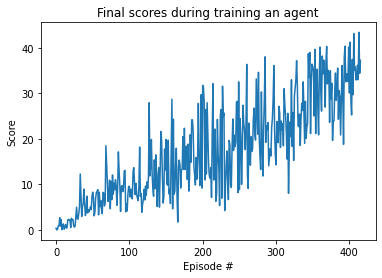

In [2]:
# Figure 1: This is a plot of final rewards over episodes during traning an agent:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_train)), scores_train)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Final scores during training an agent')
plt.show()

Mean Score: 35.516599206142125


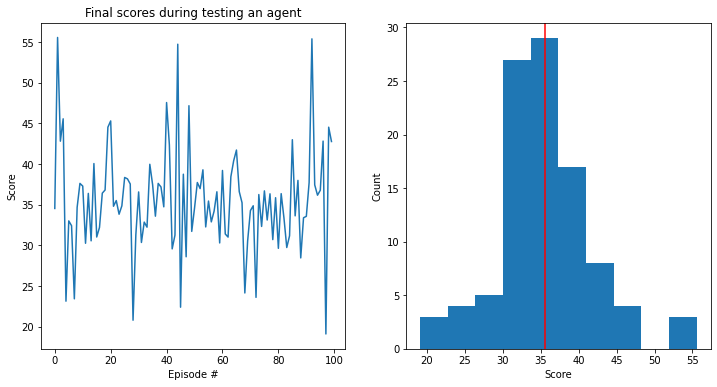

In [3]:
# Figure 2: This is a plot of rewards during testing of an agent that read learned weights from the previous training session:

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(np.arange(len(scores_test)), scores_test)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Final scores during testing an agent')

plt.subplot(1,2,2)
score_mean = np.mean(scores_test)
plt.hist(scores_test)
plt.ylabel('Count')
plt.xlabel('Score')
plt.axvline(x=score_mean, color='red')

print('Mean Score:', score_mean)

# Discussion
To improve the performance of the agent, we could try to improve the hyper-parameters. Specifically, we can either use random or grid-based approach to maximize performance of an agent as hyper-parameters are varied. We could also vary the neural-network structure as well, including both depth and width of networks. Lastly, we could try other deep reinforcement learning algorithms for continous control, such as TNPG (Truncated Natural Policy Gradient) and TRPO (Trust Region Policy Optimization), which performed comparable to DDPG against the same benchmark (Duan 2016). We could also try a more recent method such as "Soft Actor-Critic" (Haarnoja 2018) which claimed to show more stable convergence behaviour for various random seeds, in contrast to the DDPG algorithm.


# References
1. [DDPG paper(Lillicrap TP et al. "Continuous control with deep reinforcement learning", 2015)](https://arxiv.org/abs/1509.02971)
2. [DDPG Algorithm Description, OpenAI](https://spinningup.openai.com/en/latest/algorithms/ddpg.html)
3. [Duan Y. et al. "Benchmarking Deep Reinforcement Learning for Continuous Control", 2016](http://proceedings.mlr.press/v48/duan16.pdf)
4. [Haarnoja T. et al. "Soft Actor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor", 2018](http://proceedings.mlr.press/v80/haarnoja18b)